In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [79]:
df = pd.read_csv('https://raw.githubusercontent.com/devdio/datasets/main/winequalityN.csv')
df.columns = ['type', 'fixed_acidity', 'volatile_acidity', 'citric_acid',
       'residual_sugar', 'chlorides', 'free_sulfur_dioxide',
       'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality']
df

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [80]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed_acidity         6487 non-null   float64
 2   volatile_acidity      6489 non-null   float64
 3   citric_acid           6494 non-null   float64
 4   residual_sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free_sulfur_dioxide   6497 non-null   float64
 7   total_sulfur_dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


<AxesSubplot: >

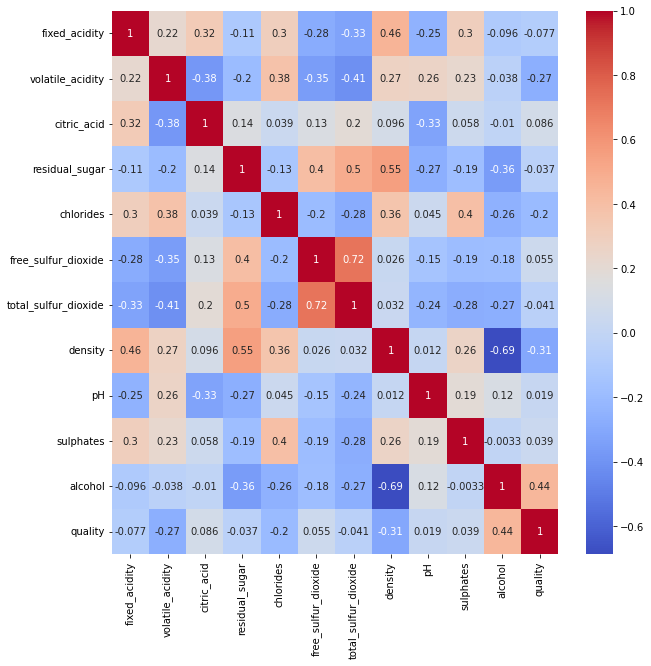

In [82]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')

## 전처리

- train, test split
- 결측치 삭제
- 레드, 화이트 인코딩
- 스케일링

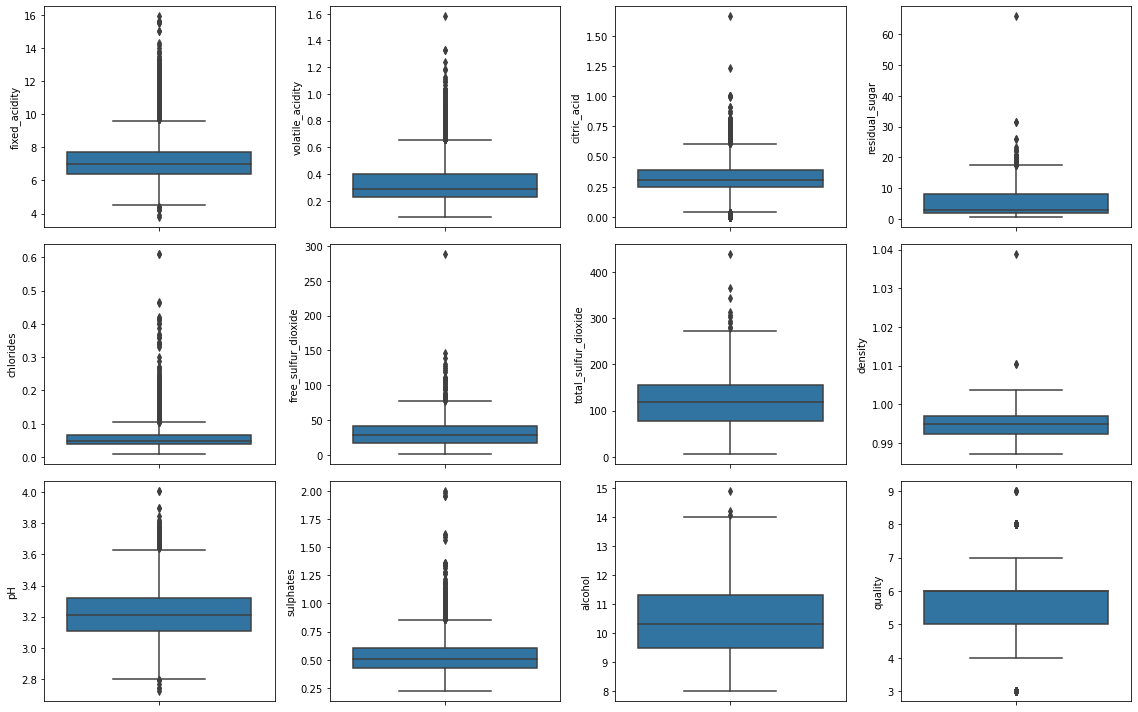

In [83]:
# boxplot

cols = ['fixed_acidity', 'volatile_acidity', 'citric_acid',
       'residual_sugar', 'chlorides', 'free_sulfur_dioxide',
       'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality']
fix, ax = plt.subplots(3, 4, figsize=(16, 10))
for i, col in enumerate(cols):
    sns.boxplot(y=col, data=df, ax=ax[i//4][i%4])


plt.tight_layout()
plt.show()

In [84]:
from sklearn.model_selection import train_test_split

X = df.drop(['quality'], axis=1)
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(5197, 12) (5197,) (1300, 12) (1300,)


In [85]:
X_train.dropna(inplace=True)
y_train = y_train.loc[X_train.index]
y_train.dropna(inplace=True)
X_train = X_train.loc[y_train.index]

X_test.dropna(inplace=True)
y_test = y_test.loc[X_test.index]
y_test.dropna(inplace=True)
X_test = X_test.loc[y_test.index]

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(5171, 12) (5171,) (1292, 12) (1292,)


In [86]:
X_train['type'] = X_train['type'].map({'white':0, 'red':1})
X_test['type'] = X_test['type'].map({'white':0, 'red':1})

In [87]:
y_train = y_train.map({3:0, 4:1, 5:2, 6:3, 7:4, 8:5, 9:6})
y_test = y_test.map({3:0, 4:1, 5:2, 6:3, 7:4, 8:5, 9:6})

In [88]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, f1_score

lr_params = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
dt_params = {'criterion': ['gini', 'entropy'], 'max_depth': [None, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]}
rf_params = {'n_estimators': [10, 20, 30, 40, 50], 'criterion': ['gini', 'entropy'], 'max_depth': [None, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]}
xgb_params = {'n_estimators': [10, 20, 30, 40, 50], 'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20], 'learning_rate': [0.01, 0.05, 0.1, 0.2]}

cv = GridSearchCV(LogisticRegression(random_state=42), lr_params, cv=5, scoring='accuracy', n_jobs=-1)
cv.fit(X_train, y_train)
print('Logistic Regression')
print('Best Score:', cv.best_score_)
print('Best Params:', cv.best_params_)
lr = cv.best_estimator_
y_pred = lr.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred, average='macro'))
print()

cv = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_params, cv=5, scoring='accuracy', n_jobs=-1)
cv.fit(X_train, y_train)
print('Decision Tree')
print('Best Score:', cv.best_score_)
print('Best Params:', cv.best_params_)
dt = cv.best_estimator_
y_pred = dt.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred, average='macro'))
print()

cv = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, scoring='accuracy', n_jobs=-1)
cv.fit(X_train, y_train)
print('Random Forest')
print('Best Score:', cv.best_score_)
print('Best Params:', cv.best_params_)
rf = cv.best_estimator_
y_pred = rf.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred, average='macro'))
print()

cv = GridSearchCV(XGBClassifier(random_state=42), xgb_params, cv=5, scoring='accuracy', n_jobs=-1)
cv.fit(X_train, y_train)
print('XGB Classifier')
print('Best Score:', cv.best_score_)
print('Best Params:', cv.best_params_)
xgb = cv.best_estimator_
y_pred = xgb.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred, average='macro'))


/Users/my_home/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/my_home/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

Logistic Regression
Best Score: 0.5457354301572618
Best Params: {'C': 10}
Accuracy: 0.5379256965944272
F1 Score: 0.22743608043014674

Decision Tree
Best Score: 0.5894429961034956
Best Params: {'criterion': 'entropy', 'max_depth': None}
Accuracy: 0.598297213622291
F1 Score: 0.3451423417491023

Random Forest
Best Score: 0.6696958484007512
Best Params: {'criterion': 'gini', 'max_depth': 18, 'n_estimators': 50}
Accuracy: 0.684984520123839
F1 Score: 0.3795698029181284

Support Vector Classifier
Best Score: 0.6609964585727768
Best Params: {'learning_rate': 0.2, 'max_depth': 14, 'n_estimators': 40}
Accuracy: 0.6702786377708978
F1 Score: 0.41488395319236415


In [90]:
rf.feature_importances_

array([0.00393333, 0.07414621, 0.10189327, 0.07972983, 0.08409629,
       0.08820697, 0.08649165, 0.08815932, 0.09849624, 0.08272102,
       0.08641869, 0.12570717])